In [126]:
import numpy as np
import matplotlib.pyplot as plt

Experimento 1

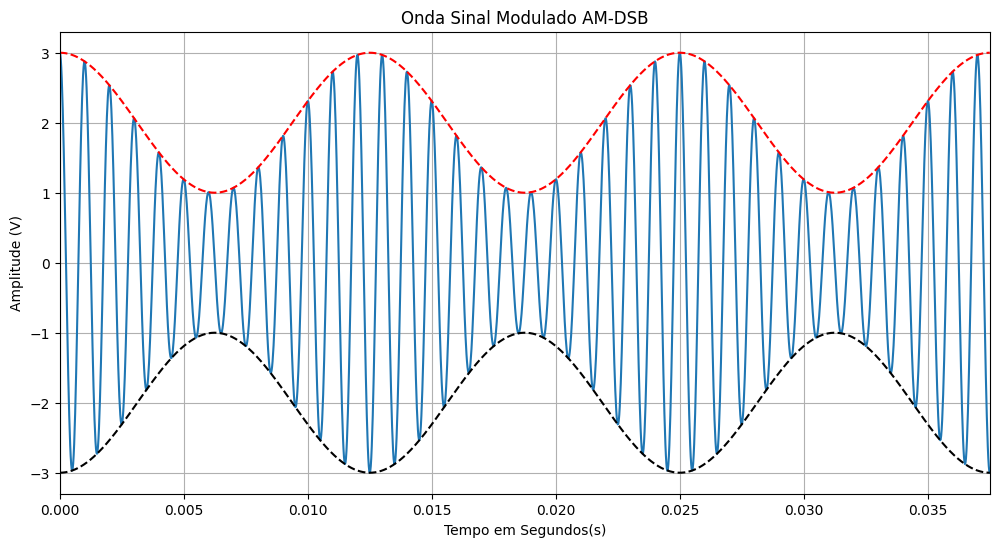

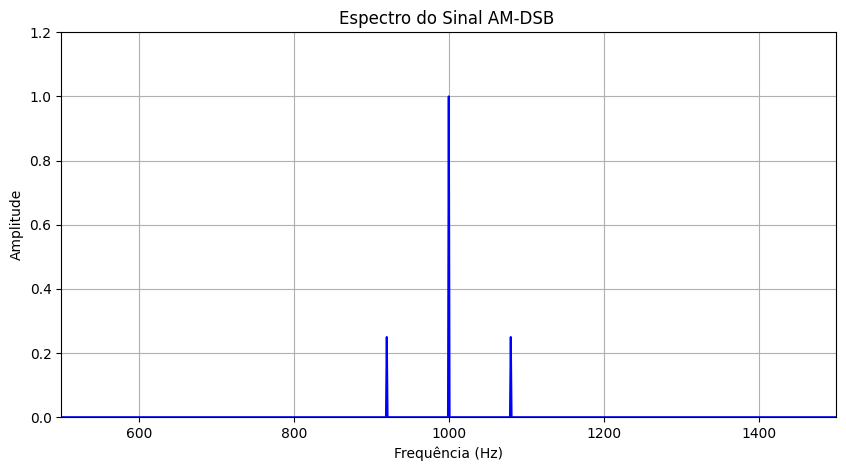

In [127]:
fm_dsb = 80
Em_dsb = 1
fc_dsb = 1000
A_dsb = 2
m = Em_dsb/A_dsb

Fs = 50000      
t = np.linspace(0, 1, Fs, endpoint=False)

msg_dsb = Em_dsb * np.cos(2 * np.pi * fm_dsb * t)
sinal_am_dsb = A_dsb * (1 + m * (msg_dsb / Em_dsb)) * np.cos(2 * np.pi * fc_dsb * t)

msg_normalizada = np.cos(2 * np.pi * fm_dsb * t) 


envelope_superior = A_dsb * (1 + m * msg_normalizada)
envelope_inferior = -envelope_superior

plt.figure(figsize=(12, 6))
plt.plot(t, sinal_am_dsb)

plt.plot(t, envelope_superior, color='red', linestyle='--', label='Envoltória')
plt.plot(t, envelope_inferior, color='black', linestyle='--')
plt.xlim(0, 3 / fm_dsb)
plt.xlabel("Tempo em Segundos(s)")
plt.ylabel("Amplitude (V)")
plt.title("Onda Sinal Modulado AM-DSB")
plt.grid(True)
plt.show()

spec_am = np.abs(np.fft.fftshift(np.fft.fft(sinal_am_dsb))) / Fs
freqs = np.fft.fftshift(np.fft.fftfreq(Fs, 1/Fs))

plt.figure(figsize=(10, 5)) 

plt.title('Espectro do Sinal AM-DSB ')
plt.plot(freqs, spec_am, 'b-')
plt.ylabel('Amplitude')
plt.xlabel('Frequência (Hz)')
plt.grid(True)

plt.xlim(fc_dsb - 500, fc_dsb + 500) 
plt.ylim(0, 1.2) 
plt.show()



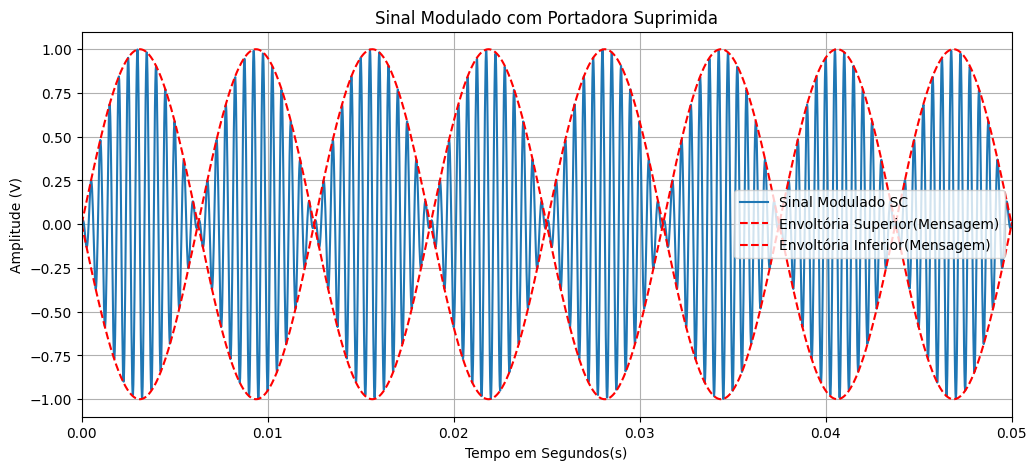

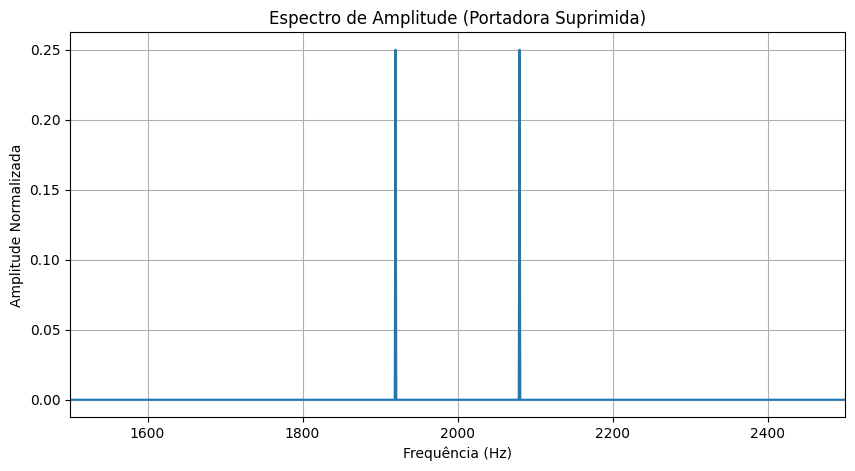

In [128]:
fm_dsb_sc = 80
Em_dsb_sc = 1
fc_dsb_sc = 2000
A_dsb_sc = 2



mensagem = Em_dsb_sc * np.sin(2 * np.pi * fm_dsb_sc * t)
portadora_normalizada = np.cos(2 * np.pi * fc_dsb_sc * t)

sinal_modulado_sc = mensagem * portadora_normalizada

plt.figure(figsize=(12, 5))
plt.plot(t, sinal_modulado_sc, label='Sinal Modulado SC')
plt.plot(t, mensagem, color='red', linestyle='--', label='Envoltória Superior(Mensagem)')
plt.plot(t, -mensagem, color='red', linestyle='--', label='Envoltória Inferior(Mensagem)')

plt.xlim(0, 4 / fm_dsb_sc)

plt.title("Sinal Modulado com Portadora Suprimida")
plt.xlabel("Tempo em Segundos(s)")
plt.ylabel("Amplitude (V)")
plt.grid(True)
plt.legend()
plt.show()

Na = 8000
t_fft = np.linspace(0, 1, Na, endpoint=False)

mensagem_fft = Em_dsb_sc * np.sin(2 * np.pi * fm_dsb_sc * t_fft)
portadora_norm_fft = np.cos(2 * np.pi * fc_dsb_sc * t_fft)
sinal_modulado_sc_fft = mensagem_fft * portadora_norm_fft

eixo_y_sc = abs(np.fft.fftshift(np.fft.fft(sinal_modulado_sc_fft))) / Na
dt = t_fft[1] - t_fft[0]
frequencia = np.fft.fftfreq(Na, dt)
eixo_x_sc = np.fft.fftshift(frequencia)

plt.figure(figsize=(10, 5))
plt.plot(eixo_x_sc, eixo_y_sc)
plt.title("Espectro de Amplitude (Portadora Suprimida)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude Normalizada")
plt.grid(True)
plt.xlim(fc_dsb_sc - 500, fc_dsb_sc + 500)
plt.show()



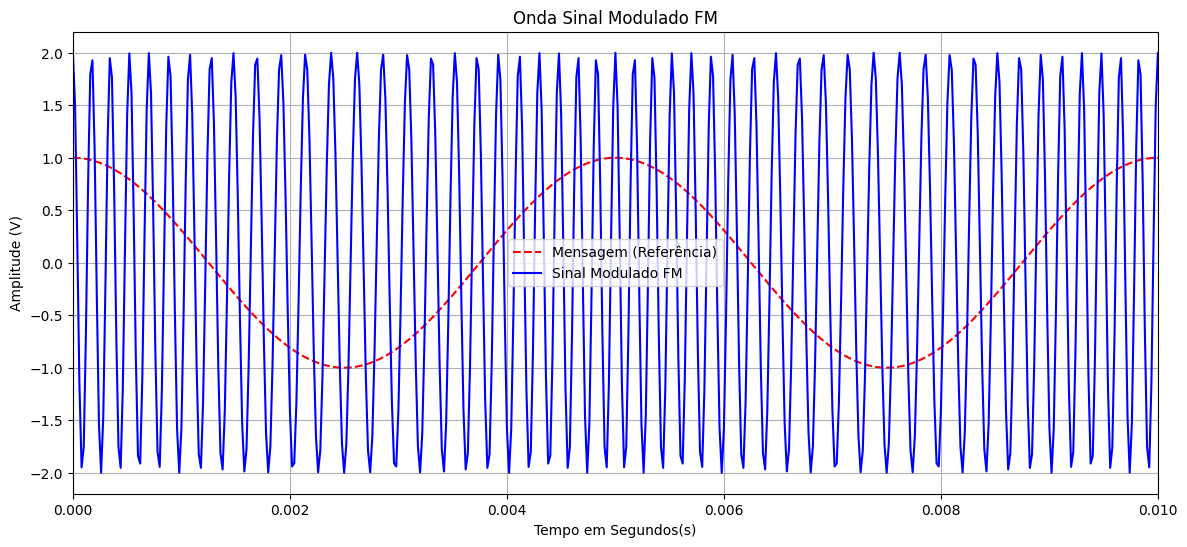

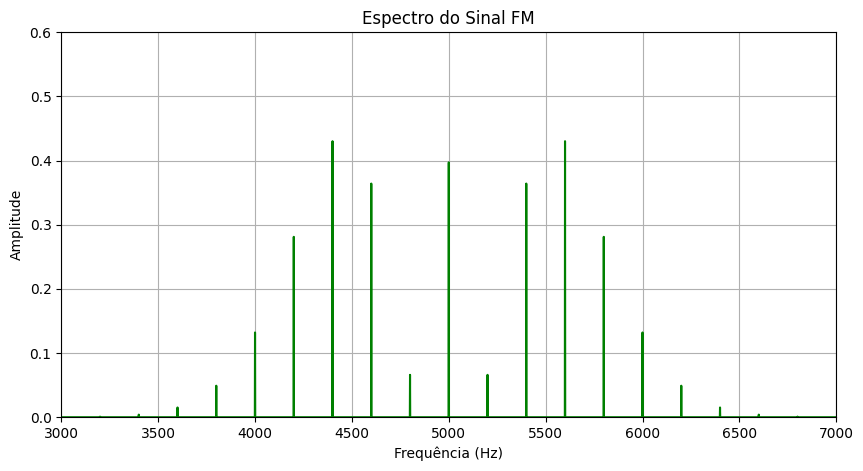

In [ ]:

fm_fm = 200      
Em_fm = 1.0       
fc_fm = 5000      
A_fm = 2.0        
beta_fm = 4.0    

mensagem_fm = Em_fm * np.cos(2 * np.pi * fm_fm * t)

sinal_fm = A_fm * np.cos(2 * np.pi * fc_fm * t + beta_fm * np.sin(2 * np.pi * fm_fm * t))


plt.figure(figsize=(14, 6))
plt.plot(t, mensagem_fm, 'r--', label='Mensagem (Referência)')
plt.plot(t, sinal_fm, 'b-', label='Sinal Modulado FM')

plt.xlim(0, 2/fm_fm) 

plt.title("Onda Sinal Modulado FM")
plt.xlabel("Tempo em Segundos(s)")
plt.ylabel("Amplitude (V)")
plt.grid(True)
plt.legend()
plt.show()

N_fm = len(t)
dt = t[1] - t[0]

spec_fm = np.abs(np.fft.fftshift(np.fft.fft(sinal_fm))) / N_fm
freqs_fm = np.fft.fftshift(np.fft.fftfreq(N_fm, dt))

plt.figure(figsize=(10, 5)) 
plt.title('Espectro do Sinal FM')
plt.plot(freqs_fm, spec_fm, 'g-')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)

delta_f = beta_fm * fm_fm 
bw_fm = 2 * (delta_f + fm_fm) 
plt.xlim(fc_fm - bw_fm, fc_fm + bw_fm)
plt.ylim(0, 0.6) 

plt.show()

Item c


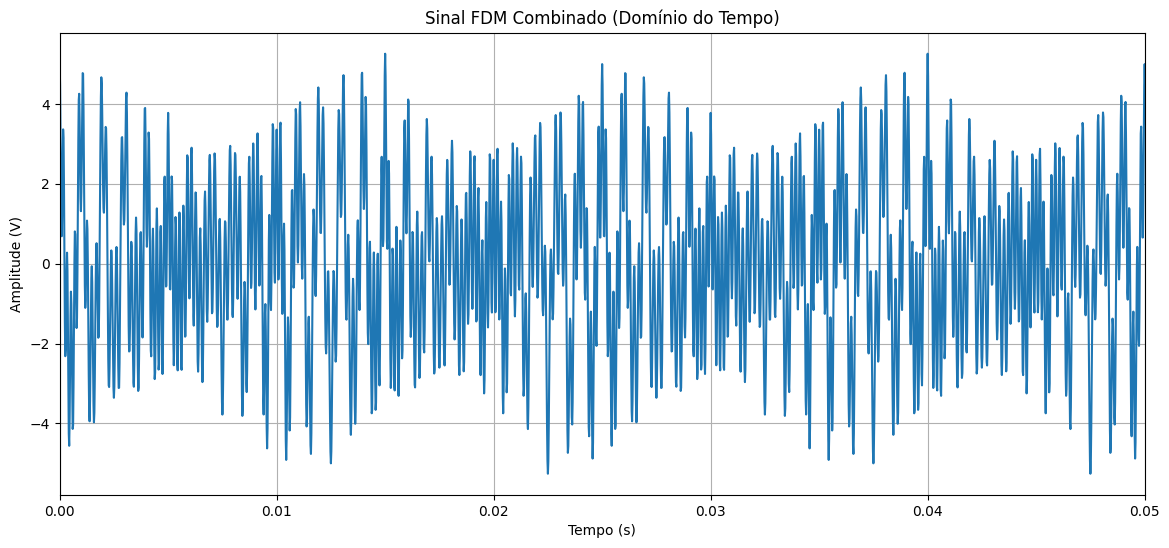

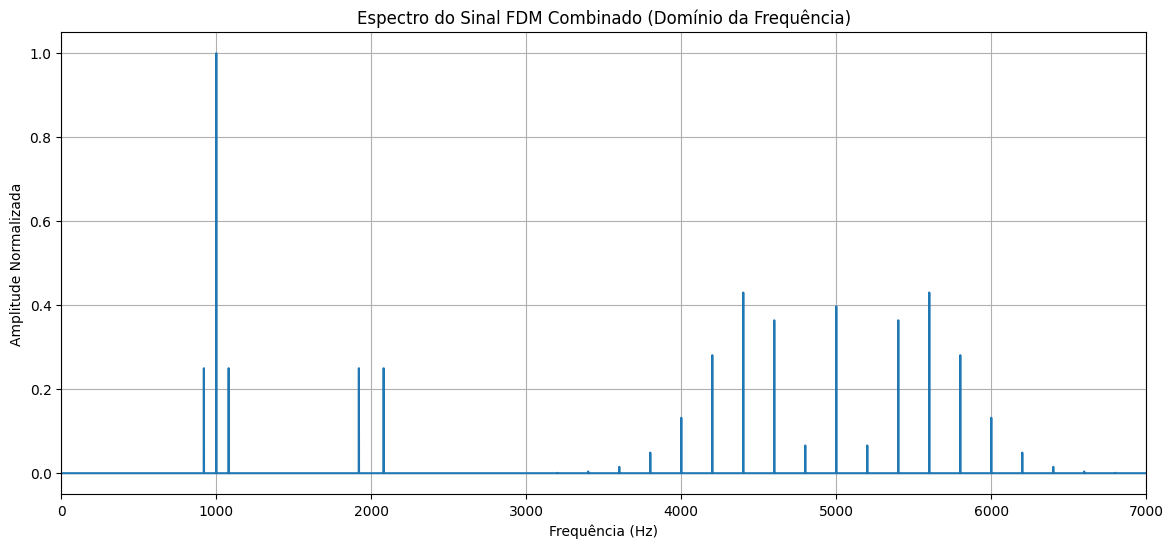

In [130]:
sinal_fdm = sinal_am_dsb + sinal_modulado_sc + sinal_fm
plt.figure(figsize=(14, 6))
plt.plot(t, sinal_fdm)
plt.title('Sinal FDM Combinado (Domínio do Tempo)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.xlim(0, 0.05) 
plt.show()

spec_fdm = np.abs(np.fft.fftshift(np.fft.fft(sinal_fdm))) / Fs
freqs_fdm = np.fft.fftshift(np.fft.fftfreq(Fs, 1/Fs))

plt.figure(figsize=(14, 6))
plt.title('Espectro do Sinal FDM Combinado (Domínio da Frequência)')
plt.plot(freqs_fdm, spec_fdm)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude Normalizada')
plt.grid(True)
plt.xlim(0, 7000) 
plt.show()

Desafio


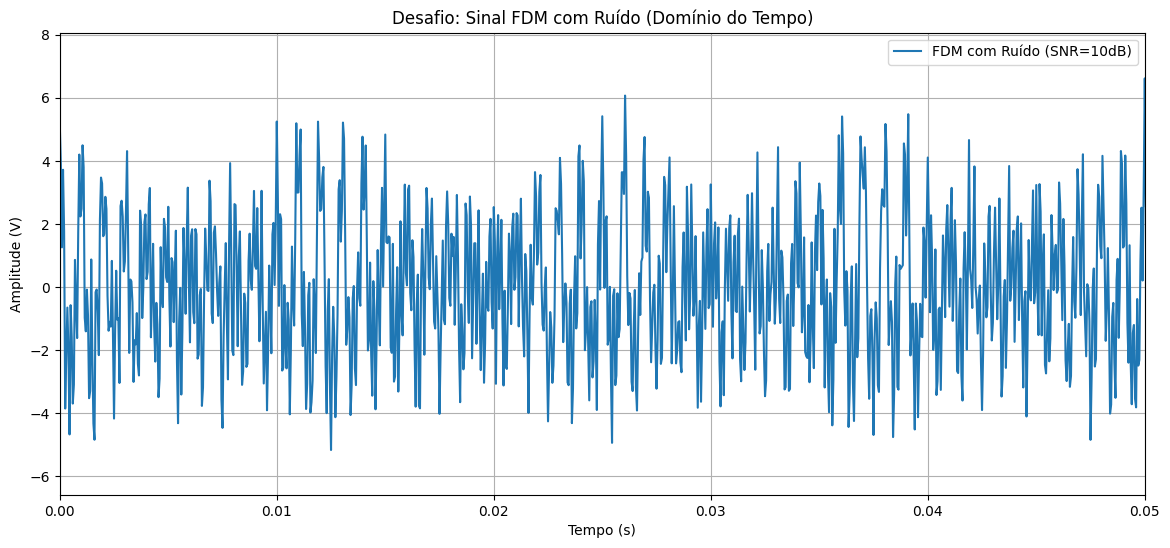

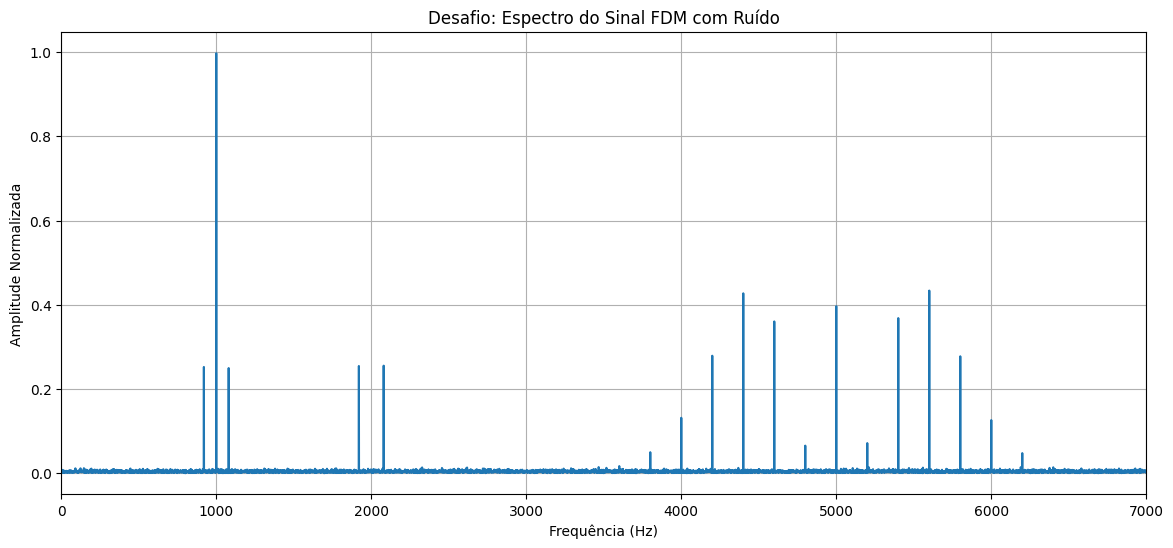

In [132]:
SNR_dB = 10.0

potencia_sinal = np.mean(sinal_fdm**2)
snr_linear = 10**(SNR_dB / 10.0)
potencia_ruido = potencia_sinal / snr_linear
ruido = np.random.normal(0, np.sqrt(potencia_ruido), len(sinal_fdm))
sinal_fdm_ruidoso = sinal_fdm + ruido

plt.figure(figsize=(14, 6))
plt.plot(t, sinal_fdm_ruidoso, label='FDM com Ruído (SNR=10dB)')

plt.title('Desafio: Sinal FDM com Ruído (Domínio do Tempo)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.xlim(0, 0.05)
plt.legend()
plt.show()

spec_fdm_ruidoso = np.abs(np.fft.fftshift(np.fft.fft(sinal_fdm_ruidoso))) / Fs
freqs_fdm = np.fft.fftshift(np.fft.fftfreq(Fs, 1/Fs))

plt.figure(figsize=(14, 6))
plt.title('Desafio: Espectro do Sinal FDM com Ruído')
plt.plot(freqs_fdm, spec_fdm_ruidoso)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude Normalizada')
plt.grid(True)
plt.xlim(0, 7000)
plt.show()